In [1]:
import sys
from pathlib import Path
sys.path.append("/home/ji-liu/GitHub/off_road_nav")

In [8]:
from offroad_det_seg_rellis.dataset.util import load_kitti_bin

points =load_kitti_bin("/home/ji-liu/GitHub/off_road_nav/RELLIS/Rellis-3D/00000/os1_cloud_node_kitti_bin/000000.bin")

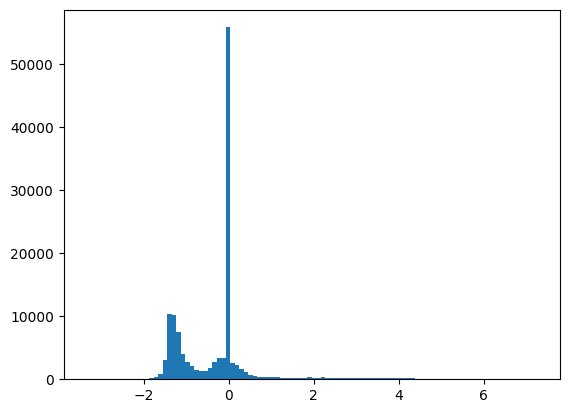

In [9]:
import matplotlib.pyplot as plt

plt.hist(points[:, 2], bins=100)
plt.show()

In [10]:
import numpy as np

np.percentile(points[:, 2], 5)

np.float32(-1.4184829)

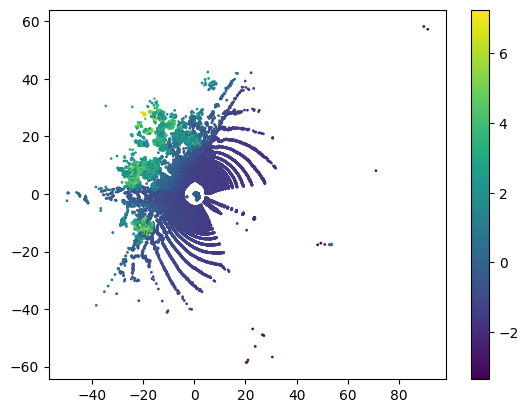

In [12]:
plt.scatter(points[:, 0], points[:, 1], c=points[:, 2],s=1, cmap="viridis")
plt.colorbar()
plt.show()

In [18]:
from offroad_det_seg_rellis.dataset.rellis_sequence import RellisSequence

rellis_seq = RellisSequence(sequence_root="/home/ji-liu/GitHub/off_road_nav/RELLIS/Rellis-3D",
sequence_id="00000")

bev_seg_gt = rellis_seq.load_bev_seg_gt(0)
print(bev_seg_gt.shape)

image = rellis_seq.get_image(0)

cam_intrins = rellis_seq.camera_intrinsics
RT_lidar2cam = rellis_seq.RT_lidar2cam

(15, 33)


In [6]:
cam_intrins.shape

(3, 3)

In [26]:
from offroad_det_seg_rellis.inference.plot_util import plot_bev_seg_polar_on_image

img_plot =plot_bev_seg_polar_on_image(image, bev_seg_gt, cam_intrins, RT_lidar2cam,
alpha=0.8, plot_on_blank=False)


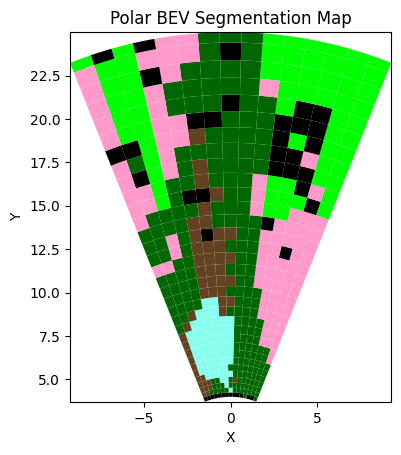

In [44]:
import numpy as np
from offroad_det_seg_rellis.dataset.bev_visualization import visualize_bev_polar
from offroad_det_seg_rellis.dataset.bev_segmentation import load_bev_map, load_bev_seg_config


polar_bev_map = load_bev_map(
          data_root="/home/ji-liu/GitHub/off_road_nav/RELLIS/Rellis-3D",
          sequence_id="00000",
          grid_type="polar",
          frame_idx=0,
      )

bev_config =bev_config=load_bev_seg_config(
        data_root="/home/ji-liu/GitHub/off_road_nav/RELLIS/Rellis-3D",
        sequence_id="00000",
        grid_type="polar",
    )
    
visualize_bev_polar(
    bev_map=polar_bev_map,
    bev_config=bev_config,
    rotation=-np.pi/2
)


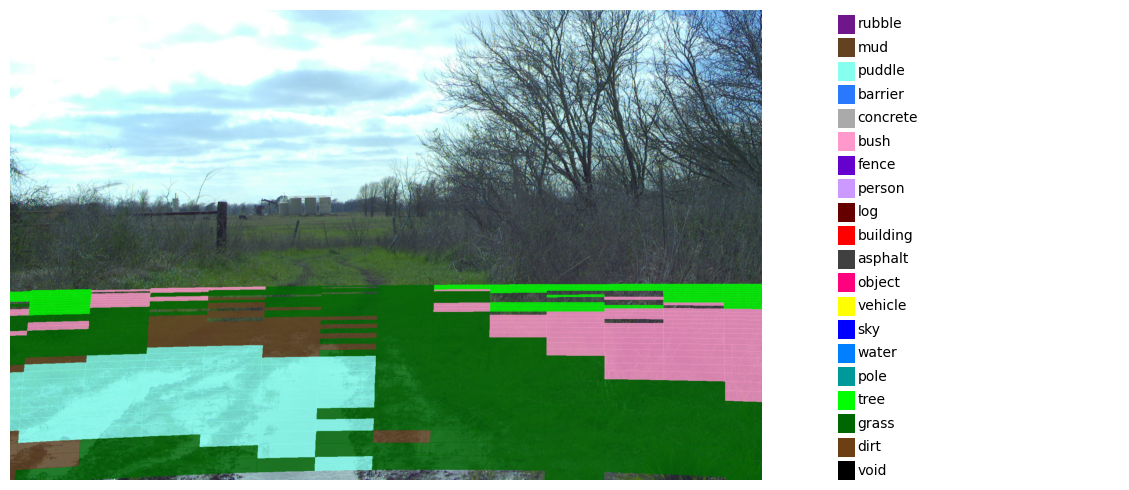

In [41]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from offroad_det_seg_rellis.dataset.bev_visualization import create_label_legend
img_plot_rgb = cv2.cvtColor(img_plot, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(12, 5))
# Use subplot2grid to span multiple positions: (rows, cols) grid, (row, col) start position, (rowspan, colspan) span
gs = GridSpec(1, 4)
ax1 = fig.add_subplot(gs[0, 0:3])
plt.imshow(img_plot_rgb)
plt.axis('off')
ax2 = fig.add_subplot(gs[0, 3])
create_label_legend(ax2)
plt.show()
